![Plane departing the Pacific Northwest](IMG_8801.JPG)

A prominent airline company in the Pacific Northwest has accumulated extensive data related to flights and weather patterns and needs to understand the factors influencing the departure delays and cancellations to benefit both airlines and passengers. As the data analyst on the team, you decide to embark on this analytical project.

The aviation industry is dynamic with various variables impacting flight operations. To ensure the relevance and applicability of your findings, you choose to focus solely on flights from the 'pnwflights2022' datasets available from the ModernDive team exported as CSV files. These datasets provide comprehensive information on flights departing in the first half of 2022 from both of the two major airports in this region: SEA (Seattle-Tacoma International Airport) and PDX (Portland International Airport): 

- `flights2022.csv` contains information about about each flight including 

| Variable   | Description                                          |
|------------|------------------------------------------------------|
| `dep_time`   | Departure time (in the format hhmm) where`NA` corresponds to a cancelled flight        |
| `dep_delay`  | Departure delay, in minutes (negative for early)    |
| `origin`     | Origin airport where flight starts (IATA code)
| `airline`    | Carrier/airline name                        |
| `dest`       | Destination airport where flight lands (IATA code)  

- `flights_weather2022.csv` contains the same flight information as well as weather conditions such as 
 
| Variable   | Description                                           |
|------------|-------------------------------------------------------|
| `visib`      | Visibility (in miles)                                 |
| `wind_gust`  | Wind gust speed (in mph)  

In [191]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# fetching data
flights_data = pd.read_csv('flights2022.csv')
weather_data = pd.read_csv('flights_weather2022.csv')

In [192]:
# Explore the flights data
flights_data.info()
flights_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111376 entries, 0 to 111375
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            111376 non-null  int64  
 1   month           111376 non-null  int64  
 2   day             111376 non-null  int64  
 3   dep_time        108931 non-null  float64
 4   sched_dep_time  111376 non-null  int64  
 5   dep_delay       108931 non-null  float64
 6   arr_time        108834 non-null  float64
 7   sched_arr_time  111376 non-null  int64  
 8   arr_delay       108697 non-null  float64
 9   carrier         111376 non-null  object 
 10  flight          111376 non-null  int64  
 11  tailnum         111247 non-null  object 
 12  origin          111376 non-null  object 
 13  dest            111376 non-null  object 
 14  air_time        108697 non-null  float64
 15  distance        111376 non-null  int64  
 16  hour            111376 non-null  int64  
 17  minute    

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,hour,minute
count,111376.0,111376.000000,111376.000000,108931.000000,111376.000000,108931.000000,108834.000000,111376.000000,108697.000000,111376.000000,108697.000000,111376.000000,111376.000000,111376.000000
mean,2022.0,3.623770,15.705520,1336.694082,1342.315894,8.036675,1467.464129,1506.513755,2.351261,433.654854,136.462635,1068.161866,13.138154,28.500530
std,0.0,1.711008,8.726934,540.817442,530.755540,41.651032,570.982918,546.861807,43.048202,267.728353,82.470682,746.734205,5.271213,18.357498
min,2022.0,1.000000,1.000000,1.000000,2.000000,-36.000000,1.000000,3.000000,-65.000000,1.000000,17.000000,93.000000,0.000000,0.000000
25%,2022.0,2.000000,8.000000,912.000000,910.000000,-5.000000,1055.000000,1115.000000,-14.000000,210.000000,78.000000,543.000000,9.000000,15.000000
50%,2022.0,4.000000,16.000000,1309.000000,1305.000000,-2.000000,1521.000000,1540.000000,-5.000000,416.000000,120.000000,909.000000,13.000000,30.000000
75%,2022.0,5.000000,23.000000,1800.000000,1800.000000,6.000000,1917.000000,1937.000000,6.000000,644.000000,193.000000,1542.000000,18.000000,45.000000
max,2022.0,6.000000,31.000000,2400.000000,2359.000000,2120.000000,2400.000000,2359.000000,2098.000000,1100.000000,397.000000,2724.000000,23.000000,59.000000


In [193]:
# keep only relevant columns
flights_use_cols = ['dep_time', 'dep_delay', 'origin', 'dest', 'airline']
brief_flights_data = flights_data[flights_use_cols]
# add 'route' and boolean 'is_cancelled' column
brief_flights_data['route'] = brief_flights_data['origin'] + '-' + brief_flights_data['dest']
brief_flights_data['is_canceled'] = brief_flights_data['dep_time'].isnull()
brief_flights_data.head()


,dep_time,dep_delay,origin,dest,airline,route,is_canceled
0,1.0,2.0,SEA,IAH,United Air Lines Inc.,SEA-IAH,False
1,1.0,71.0,SEA,FAI,Alaska Airlines Inc.,SEA-FAI,False
2,10.0,15.0,SEA,ATL,Alaska Airlines Inc.,SEA-ATL,False
3,25.0,35.0,SEA,ORD,Alaska Airlines Inc.,SEA-ORD,False
4,35.0,46.0,PDX,ORD,United Air Lines Inc.,PDX-ORD,False


In [194]:
# For each route, determine the average delays and the total number of canceled flights
routes_delays_cancels = brief_flights_data.groupby('route').agg({'dep_delay':'mean', 'is_canceled':'sum'})
routes_delays_cancels.columns = ['mean_dep_delay','total_cancellations']
routes_delays_cancels.reset_index(inplace=True)
routes_delays_cancels.head()

,route,mean_dep_delay,total_cancellations
0,PDX-ABQ,1.098039,2
1,PDX-ANC,4.748936,4
2,PDX-ATL,7.020979,13
3,PDX-AUS,5.435374,5
4,PDX-BOI,5.136430,7


In [195]:
# For each route, determine the average delays and the total number of canceled flights
airlines_delays_cancels = brief_flights_data.groupby('airline').agg({'dep_delay':'mean','is_canceled':'sum'})
airlines_delays_cancels.columns = ['mean_dep_delay','total_cancellations']
airlines_delays_cancels.reset_index(inplace=True)
airlines_delays_cancels.head()

,airline,mean_dep_delay,total_cancellations
0,Alaska Airlines Inc.,6.739282,1300
1,Allegiant Air,26.608696,6
2,American Airlines Inc.,20.129903,85
3,Delta Air Lines Inc.,10.648634,383
4,Frontier Airlines Inc.,14.355856,12


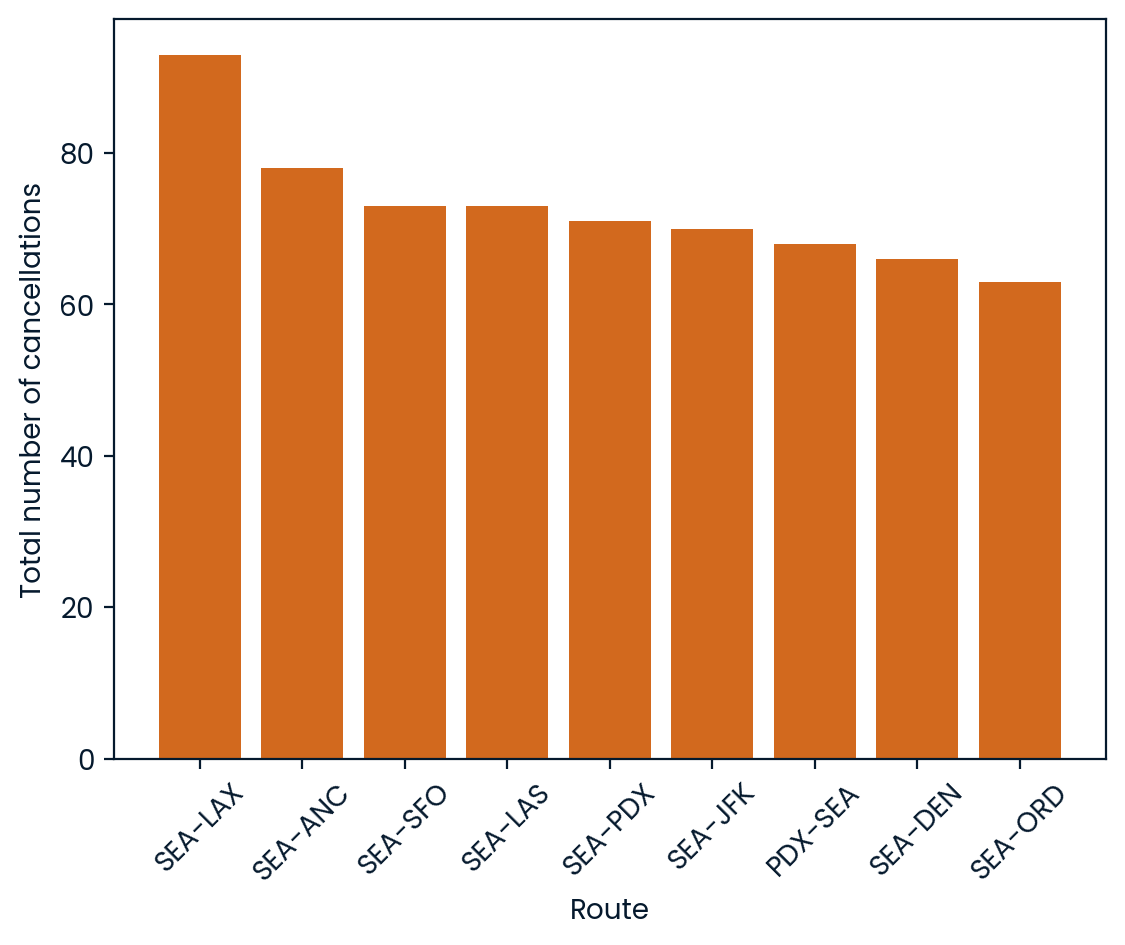

In [196]:
# The top 9 highest number of cancellations by route
top_routes_by_cancellations = routes_delays_cancels.sort_values(by=['total_cancellations'], ascending=False, inplace=False).head(9)
top_routes_by_delay = routes_delays_cancels.sort_values(by=['mean_dep_delay'], ascending=False, inplace=False).head(9)
top9_route_cancels_bar = plt.figure()
plt.bar(top_routes_by_cancellations['route'], 
                                  top_routes_by_cancellations['total_cancellations'],
                                  color='chocolate')
plt.xticks(rotation=45)
plt.ylabel('Total number of cancellations')
plt.xlabel('Route')
plt.show()
plt.close()

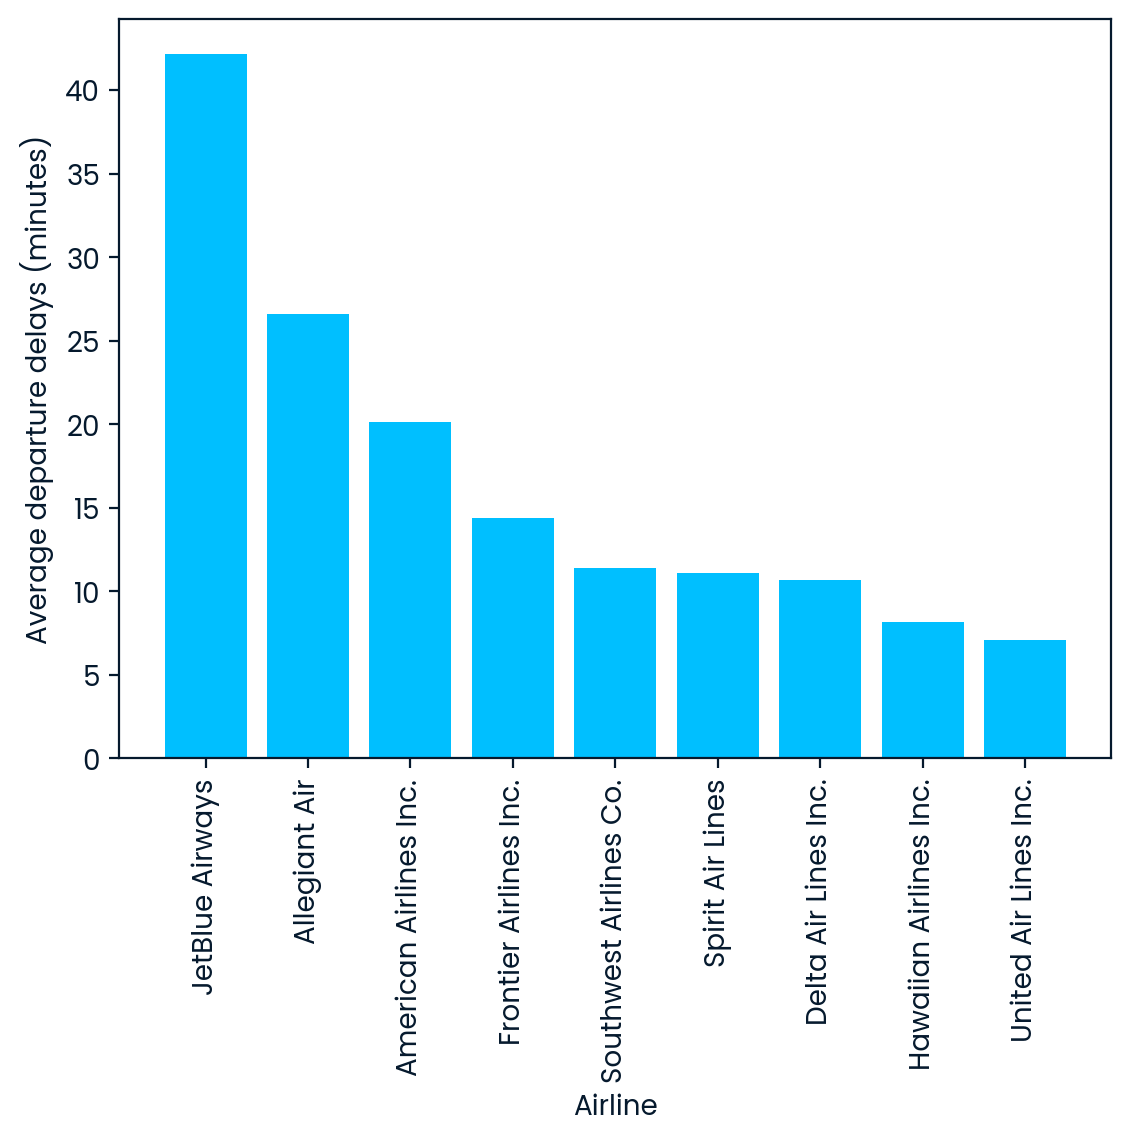

In [197]:
# The top 9 highest avg delays by airlines
top_airlines_by_delay = airlines_delays_cancels.sort_values(by=['mean_dep_delay'], ascending=False, inplace=False).head(9)
top9_airline_delays_bar = plt.figure()
plt.bar(top_airlines_by_delay['airline'], 
         top_airlines_by_delay['mean_dep_delay'],
         color='deepskyblue')
plt.xticks(rotation=90)
plt.ylabel('Average departure delays (minutes)')
plt.xlabel('Airline')
plt.show()
plt.close()

In [198]:
weather_data.info()
weather_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111006 entries, 0 to 111005
Data columns (total 29 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            111006 non-null  int64  
 1   month           111006 non-null  int64  
 2   day             111006 non-null  int64  
 3   dep_time        108566 non-null  float64
 4   sched_dep_time  111006 non-null  int64  
 5   dep_delay       108566 non-null  float64
 6   arr_time        108469 non-null  float64
 7   sched_arr_time  111006 non-null  int64  
 8   arr_delay       108332 non-null  float64
 9   carrier         111006 non-null  object 
 10  flight          111006 non-null  int64  
 11  tailnum         110877 non-null  object 
 12  origin          111006 non-null  object 
 13  dest            111006 non-null  object 
 14  air_time        108332 non-null  float64
 15  distance        111006 non-null  int64  
 16  hour            111006 non-null  int64  
 17  minute    

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,airline,route,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
0,2022,1,1,1.0,2359,2.0,604.0,618,-14.0,UA,555,N405UA,SEA,IAH,221.0,1874,23,59,United Air Lines Inc.,SEA-IAH,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0
1,2022,1,1,1.0,2250,71.0,242.0,142,60.0,AS,72,N265AK,SEA,FAI,193.0,1533,22,50,Alaska Airlines Inc.,SEA-FAI,32.0,23.0,69.04,170.0,9.20624,10.594357,0.0,1023.4,10.0
2,2022,1,1,10.0,2355,15.0,759.0,730,29.0,AS,270,N274AK,SEA,ATL,261.0,2182,23,55,Alaska Airlines Inc.,SEA-ATL,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0
3,2022,1,1,25.0,2350,35.0,606.0,550,16.0,AS,7,N281AK,SEA,ORD,193.0,1721,23,50,Alaska Airlines Inc.,SEA-ORD,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0
4,2022,1,1,35.0,2349,46.0,616.0,545,31.0,UA,507,N426UA,PDX,ORD,196.0,1739,23,49,United Air Lines Inc.,PDX-ORD,33.0,19.0,55.75,120.0,6.90468,7.945768,0.0,1025.1,10.0


In [199]:
# remove entries with no wind_gust data
weather_data.dropna(subset='wind_gust',inplace=True)

# check if wind_gust >= 10 
weather_data['is_high_wind_gust'] = weather_data['wind_gust'] >= 10
dep_delay_by_wind_gust = weather_data.groupby('is_high_wind_gust')['dep_delay'].agg('mean')

In [200]:
wind_response =  dep_delay_by_wind_gust.loc[True] > dep_delay_by_wind_gust.loc[False]
print(wind_response)

True
